In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
df_final = pd.read_parquet(r'/content/drive/MyDrive/Dict/df_final.parquet')

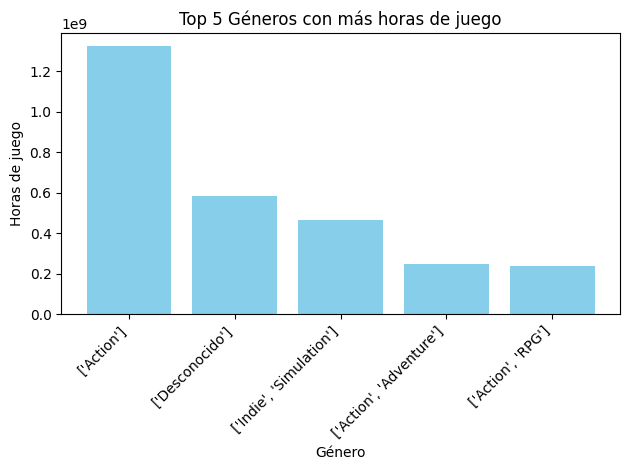

In [10]:
import matplotlib.pyplot as plt

# Agrupar por género y sumar las horas de juego
top_genres = df_final.groupby('genres')['playtime_forever'].sum()

# Seleccionar los 5 géneros con más horas de juego
top_5_genres = top_genres.nlargest(5)

# Generar el gráfico de barras
plt.bar(top_5_genres.index, top_5_genres.values, color='skyblue')  # Puedes cambiar el color si lo deseas
plt.title('Top 5 Géneros con más horas de juego')
plt.xlabel('Género')
plt.ylabel('Horas de juego')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()


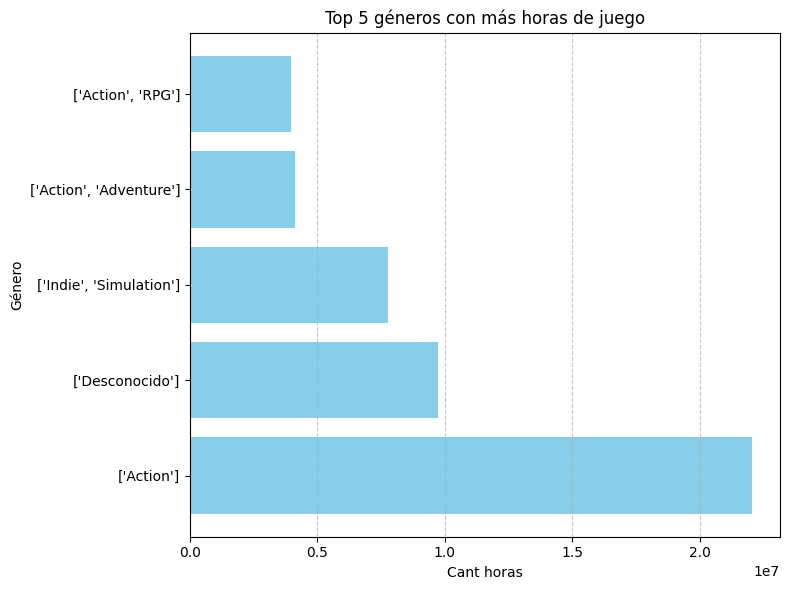

In [13]:
import matplotlib.pyplot as plt

# Agrupar por género y sumar el tiempo de juego
grouped_df = df_final.groupby('genres')['playtime_forever'].sum() / 60

# Ordenar y seleccionar los 5 géneros con más tiempo de juego
top_5 = grouped_df.sort_values(ascending=False).head(5)

# Generar el gráfico de barras horizontal con un estilo diferente
plt.figure(figsize=(8, 6))
plt.barh(top_5.index, top_5.values, color='skyblue')  # Utilizamos barh para barras horizontales
plt.title('Top 5 géneros con más horas de juego')
plt.xlabel('Horas')
plt.ylabel('Género')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Agregamos una rejilla en el eje x
plt.tight_layout()
plt.show()

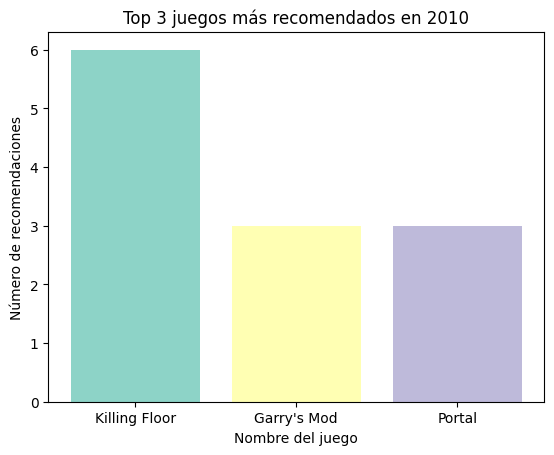

In [8]:
import matplotlib.pyplot as plt

# Selecciona el año
año_seleccionado = 2010
# Filtra los datos para el año seleccionado y las recomendaciones positivas
df_filtrado = df_final[(df_final['year'] == año_seleccionado) & ((df_final['recommend'] == True) | (df_final['sentiment_analysis'] == 2))]
# Cuenta las recomendaciones para cada juego
recommend_count = df_filtrado['item_name'].value_counts()
# Selecciona los 3 juegos con más recomendaciones
top_3_games = recommend_count.nlargest(3)

# Utiliza la paleta de colores 'Set3'
colors = plt.cm.Set3(range(len(top_3_games)))

# Genera el gráfico de barras con colores profesionales
plt.bar(top_3_games.index, top_3_games.values, color=colors)
plt.title('Top 3 juegos más recomendados en ' + str(año_seleccionado))
plt.xlabel('Nombre del juego')
plt.ylabel('Número de recomendaciones')
plt.show()



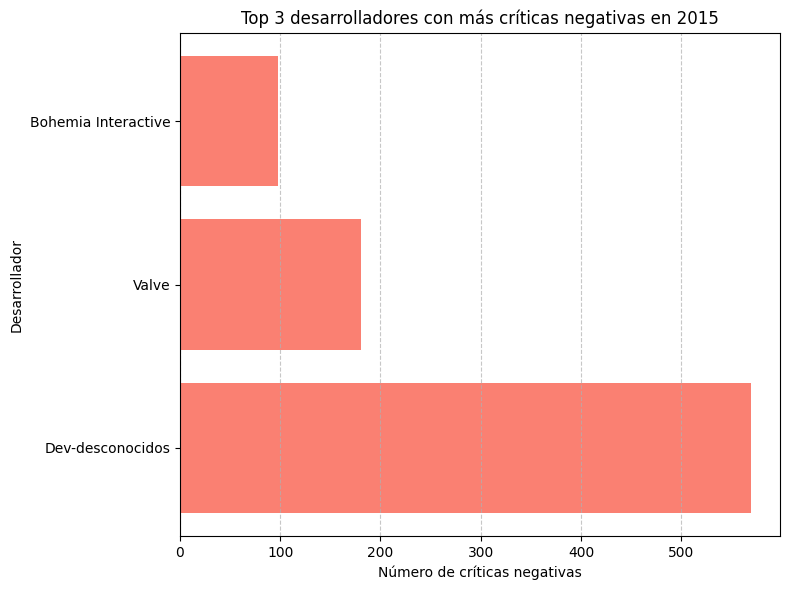

In [14]:
# Seleccionar el año
año_seleccionado = 2015

# Filtrar los datos para el año seleccionado, críticas negativas y desarrolladores distintos de 'SinDato'
df_filtered = df_final.loc[(df_final['year'] == año_seleccionado) &
                           (df_final['recommend'] == False) &
                           (df_final['developer'] != 'SinDato')]

# Contar las críticas negativas para cada desarrollador
negative_reviews_count = df_filtered['developer'].value_counts()

# Seleccionar los 3 desarrolladores con más críticas negativas
top_3_bad_developers = negative_reviews_count.nlargest(3)

# Generar el gráfico de barras horizontal con un esquema de color diferente
plt.figure(figsize=(8, 6))
plt.barh(top_3_bad_developers.index, top_3_bad_developers.values, color='salmon')  # Color personalizado
plt.title(f'Top 3 desarrolladores con más críticas negativas en {año_seleccionado}')
plt.xlabel('Número de críticas negativas')
plt.ylabel('Desarrollador')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Agregar rejilla en el eje x
plt.tight_layout()
plt.show()

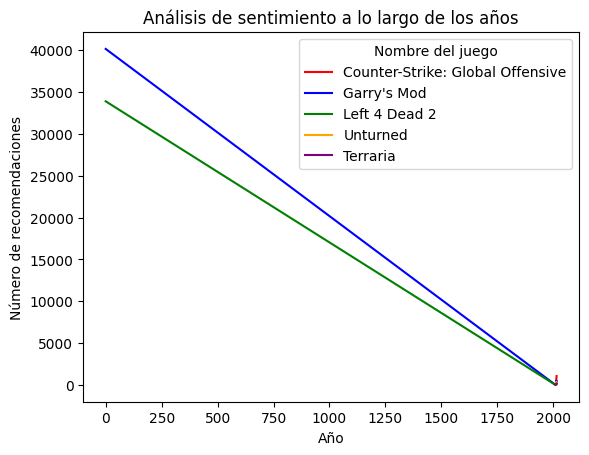

In [19]:
# Filtrar los datos para las recomendaciones positivas
df_filtrado2 = df_final[df_final['sentiment_analysis'] == 2]
# Cuenta las recomendaciones para cada juego y cada año
recommend_count = df_filtrado2.groupby(['item_name', 'year']).size()
# Selecciona los 5 juegos con más recomendaciones en total
top5juegos = recommend_count.groupby('item_name').sum().nlargest(5).index
# Filtra los datos para los 5 juegos con más recomendaciones
top5filtrado = recommend_count.loc[top5juegos]

# Generar el gráfico de líneas con diferentes colores
colores = ['red', 'blue', 'green', 'orange', 'purple']  # Lista de colores
top5filtrado.unstack('item_name').plot(kind='line', color=colores)

plt.title('Análisis de sentimiento a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Número de recomendaciones')
plt.legend(title='Nombre del juego')
plt.show()


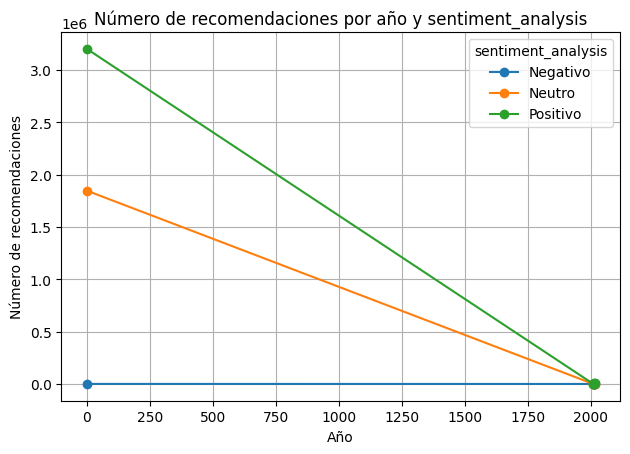

In [20]:
# Cuenta las recomendaciones para cada año y cada valor de 'sentiment_analysis'
recommend_count = df_final.groupby(['year', 'sentiment_analysis']).size().unstack(fill_value=0)

# Generar el gráfico de líneas con diferentes colores para cada valor de 'sentiment_analysis'
recommend_count.plot(kind='line', marker='o')

plt.title('Número de recomendaciones por año y sentiment_analysis')
plt.xlabel('Año')
plt.ylabel('Número de recomendaciones')
plt.legend(['Negativo', 'Neutro', 'Positivo'], title='sentiment_analysis')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
df_final.describe()

,item_id,playtime_forever,year,sentiment_analysis,release_date,price
count,5.100274e+06,5.100274e+06,5.100274e+06,5.100274e+06,5.100274e+06,5.100274e+06
mean,1.783901e+05,9.893138e+02,1.863793e+01,1.632493e+00,1.645431e+03,1.042348e+01
std,1.318489e+05,5.410937e+03,1.928557e+02,4.856021e-01,7.758666e+02,1.303693e+01
min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.445000e+04,0.000000e+00,0.000000e+00,1.000000e+00,2.005000e+03,0.000000e+00
50%,2.144200e+05,3.300000e+01,0.000000e+00,2.000000e+00,2.011000e+03,9.990000e+00
75%,2.664300e+05,3.540000e+02,0.000000e+00,2.000000e+00,2.014000e+03,1.499000e+01
max,5.307200e+05,6.427730e+05,2.015000e+03,2.000000e+00,2.018000e+03,7.717100e+02


Búsqueda de valores atípicos:

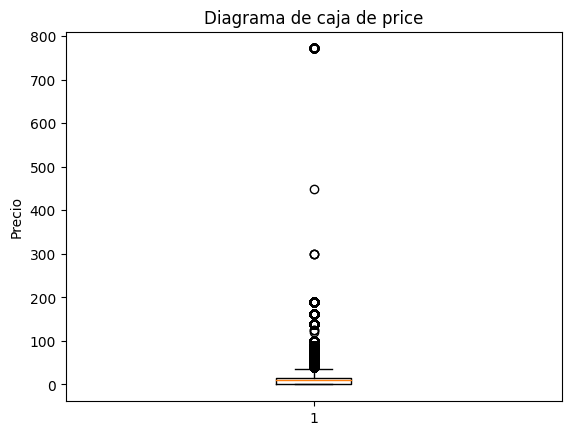

In [27]:
plt.boxplot(df_final['price'])
plt.title('Diagrama de caja de price')
plt.ylabel('Precio')
plt.show()

Nubes de palabras (Word Clouds):

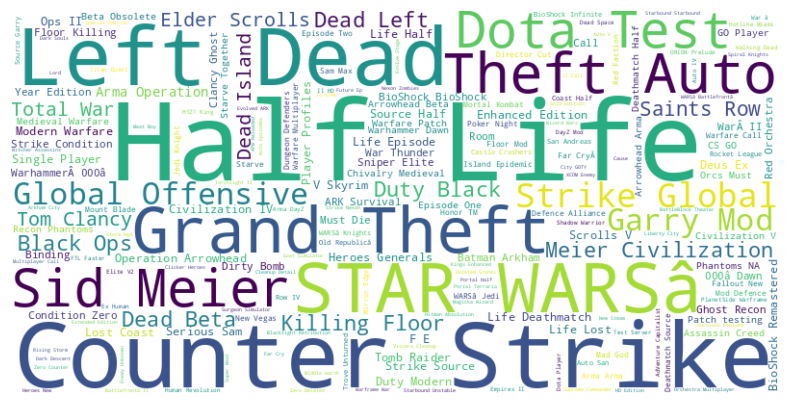

In [28]:
from wordcloud import WordCloud

text = ' '.join(df_final['item_name'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()